<a href="https://colab.research.google.com/github/lhs7091/PythonTensorExam/blob/master/exam_11/cnn_07_mnist_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import random
import matplotlib.pyplot as plt
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)


import time
start_time = time.time()

# MNIST dowload
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mist_data", one_hot=True)

1.15.0
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mist_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mist_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mist_data/t10k-images-idx3-ubyte.gz
Extracting ./mist_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
# initial parameter
learning_rate = 0.001
training_epochs = 15
batch_size = 100
keep_prob = tf.placeholder(tf.float32)

In [0]:
# define CNN Model
def build_CNN_classifier(x_data):
    x_image = tf.reshape(x_data, [-1, 28, 28, 1])

    # L1 image shape=(?, 28, 28, 1)
    W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
    L1 = tf.nn.conv2d(x_image, W1, strides=[1, 1, 1, 1], padding='SAME')
    L1 = tf.nn.relu(L1)
    L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

    # L2 image shape=(?, 14, 14, 32)
    W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
    L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
    L2 = tf.nn.relu(L2)
    L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

    # L3 image shape=(?, 7, 7, 64)
    W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
    L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
    L3 = tf.nn.relu(L3)
    L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
    L3_flat = tf.reshape(L3, [-1, 128 * 4 * 4])

    # L4 FC 4*4*128 inputs -> 625 outputs
    W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625], initializer=tf.contrib.layers.xavier_initializer())
    b4 = tf.Variable(tf.random_normal([625]))
    L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
    L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

    # L5 Final FC 625 inputs -> 10
    W5 = tf.get_variable("W5", shape=[625, 10], initializer=tf.contrib.layers.xavier_initializer())
    b5 = tf.Variable(tf.random_normal([10]))
    logits = tf.matmul(L4, W5) + b5
    y_pred = tf.nn.softmax(logits)

    return y_pred, logits


In [0]:
# define input, output variables by placehoder
x = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])

In [7]:
# define Convolutional Neural Networks(CNN)
y_pred, logits = build_CNN_classifier(x)

# cost/loss and optimizer
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logits))
train_step = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

# caculate accuracy
correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
# save model and parameters by tf.train.Saver
SAVER_DIR = "./result_training/"
saver = tf.train.Saver()
checkpoint_path = os.path.join(SAVER_DIR, "model")
ckpt = tf.train.get_checkpoint_state(SAVER_DIR)

In [9]:
!ls -l

total 8
drwxr-xr-x 2 root root 4096 Jan 25 04:58 mist_data
drwxr-xr-x 1 root root 4096 Jan 13 16:38 sample_data


Epoch: 0001 cost= 0.356031926
Epoch: 0002 cost= 0.105282041
Epoch: 0003 cost= 0.079993059
Epoch: 0004 cost= 0.064503905
Epoch: 0005 cost= 0.055016609
Epoch: 0006 cost= 0.047954093
Epoch: 0007 cost= 0.046176621
Epoch: 0008 cost= 0.039816581
Epoch: 0009 cost= 0.040310589
Epoch: 0010 cost= 0.036855631
Epoch: 0011 cost= 0.035443319
Epoch: 0012 cost= 0.030888128
Epoch: 0013 cost= 0.031760953
Epoch: 0014 cost= 0.028613958
Epoch: 0015 cost= 0.028678297
Accuracy :  0.9948
Label:  [0]
Prediction:  [0]
작업 수행된 시간 : 57.669879 초


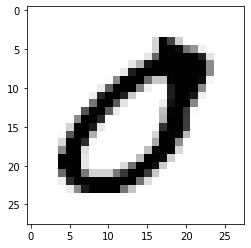

In [10]:
# training data
import time
start_time = time.time()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # if there are data saved, restore the data first
    # else, start to training
    #if ckpt and ckpt.model_checkpoint_path:
        #saver.restore(sess, ckpt.model_checkpoint_path)
        #print("Load of test set")

    #else:
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples/batch_size)
        for step in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([loss, train_step], feed_dict={x: batch_xs, y: batch_ys, keep_prob:0.7})
            train_accuracy = accuracy.eval(feed_dict={x: batch_xs, y: batch_ys, keep_prob:0.7})
            avg_cost += c / total_batch
            #saver.save(sess, checkpoint_path, global_step=step)

        print("Epoch:", "%04d" % (epoch + 1), "cost=", "{:.9f}".format(avg_cost))

    # test the model using tet sets
    print("Accuracy : ", accuracy.eval(session=sess, feed_dict={x: mnist.test.images, y: mnist.test.labels, keep_prob:1.0}), )

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(tf.argmax(y_pred.eval(feed_dict={x: mnist.test.images[r:r + 1], keep_prob:1.0}),1)))
    plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap="Greys", interpolation="nearest", )
    print('working time : %f 초' % (time.time() - start_time))
    plt.show()
